In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Setel gaya untuk plot
sns.set(style="whitegrid")

# Path absolut ke file CSV
path = 'D:\\Dataset\\heart_disease_uci.csv'

# Membaca file CSV
df =pd.read_csv(path)
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [31]:
df.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [33]:
# Informasi tentang dataset
print("\nInformasi Dataset : ")
df_info = pd.DataFrame({
    'Column': df.columns,
    'Non-Null Count': df.count().values,
    'Data Type': df.dtypes.values
})
print(tabulate(df_info, headers='keys', tablefmt='fancy_grid'))


Informasi Dataset : 
╒════╤══════════╤══════════════════╤═════════════╕
│    │ Column   │   Non-Null Count │ Data Type   │
╞════╪══════════╪══════════════════╪═════════════╡
│  0 │ id       │              920 │ int64       │
├────┼──────────┼──────────────────┼─────────────┤
│  1 │ age      │              920 │ int64       │
├────┼──────────┼──────────────────┼─────────────┤
│  2 │ sex      │              920 │ object      │
├────┼──────────┼──────────────────┼─────────────┤
│  3 │ dataset  │              920 │ object      │
├────┼──────────┼──────────────────┼─────────────┤
│  4 │ cp       │              920 │ object      │
├────┼──────────┼──────────────────┼─────────────┤
│  5 │ trestbps │              861 │ float64     │
├────┼──────────┼──────────────────┼─────────────┤
│  6 │ chol     │              890 │ float64     │
├────┼──────────┼──────────────────┼─────────────┤
│  7 │ fbs      │              830 │ object      │
├────┼──────────┼──────────────────┼─────────────┤
│  8 │ re

In [35]:
# Cek nilai yang hilang
missing_values = df.isnull().sum().reset_index()
missing_values.columns = ['Column', 'Missing Values']
print("\nNilai yang Hilang : ")
print(tabulate(missing_values, headers='keys', tablefmt='fancy_grid'))

# Identifikasi outliers menggunakan box plots untuk setiap variabel numerik secara terpisah
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("\nIdentifikasi Outliers:")
for col in numeric_cols:
    # Hitung IQR untuk setiap kolom numerik
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Temukan outliers
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    num_outliers = outliers.shape[0]
    
    print(f"\nKolom: {col}")
    print(f"Jumlah Outliers: {num_outliers}")
    if num_outliers > 0:
        print(outliers[[col]].head())
    else:
        print("Tidak ada outliers.")


Nilai yang Hilang : 
╒════╤══════════╤══════════════════╕
│    │ Column   │   Missing Values │
╞════╪══════════╪══════════════════╡
│  0 │ id       │                0 │
├────┼──────────┼──────────────────┤
│  1 │ age      │                0 │
├────┼──────────┼──────────────────┤
│  2 │ sex      │                0 │
├────┼──────────┼──────────────────┤
│  3 │ dataset  │                0 │
├────┼──────────┼──────────────────┤
│  4 │ cp       │                0 │
├────┼──────────┼──────────────────┤
│  5 │ trestbps │               59 │
├────┼──────────┼──────────────────┤
│  6 │ chol     │               30 │
├────┼──────────┼──────────────────┤
│  7 │ fbs      │               90 │
├────┼──────────┼──────────────────┤
│  8 │ restecg  │                2 │
├────┼──────────┼──────────────────┤
│  9 │ thalch   │               55 │
├────┼──────────┼──────────────────┤
│ 10 │ exang    │               55 │
├────┼──────────┼──────────────────┤
│ 11 │ oldpeak  │               62 │
├────┼──────────

In [37]:
# Statistik deskriptif
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    print(f"\nStatistik untuk {col} : ")
    print(f"Mean            : {df[col].mean()}")
    print(f"Median          : {df[col].median()}")
    print(f"Mode            : {df[col].mode()[0]}")
    print(f"Standar Deviasi : {df[col].std()}")
    print(f"Variansi        : {df[col].var()}")
    print(f"Skewness        : {df[col].skew()}")
    print(f"Kurtosis        : {df[col].kurt()}")
    print("-------------------------------------")


Statistik untuk id : 
Mean            : 460.5
Median          : 460.5
Mode            : 1
Standar Deviasi : 265.72542219366215
Variansi        : 70610.0
Skewness        : 0.0
Kurtosis        : -1.2
-------------------------------------

Statistik untuk age : 
Mean            : 53.51086956521739
Median          : 54.0
Mode            : 54
Standar Deviasi : 9.424685209576857
Variansi        : 88.82469129961677
Skewness        : -0.195993861608106
Kurtosis        : -0.3829298182845311
-------------------------------------

Statistik untuk trestbps : 
Mean            : 132.13240418118468
Median          : 130.0
Mode            : 120.0
Standar Deviasi : 19.066069518587458
Variansi        : 363.51500688760973
Skewness        : 0.21333446967212508
Kurtosis        : 2.958664416580538
-------------------------------------

Statistik untuk chol : 
Mean            : 199.13033707865168
Median          : 223.0
Mode            : 0.0
Standar Deviasi : 110.78081035323044
Variansi        : 12272.38794

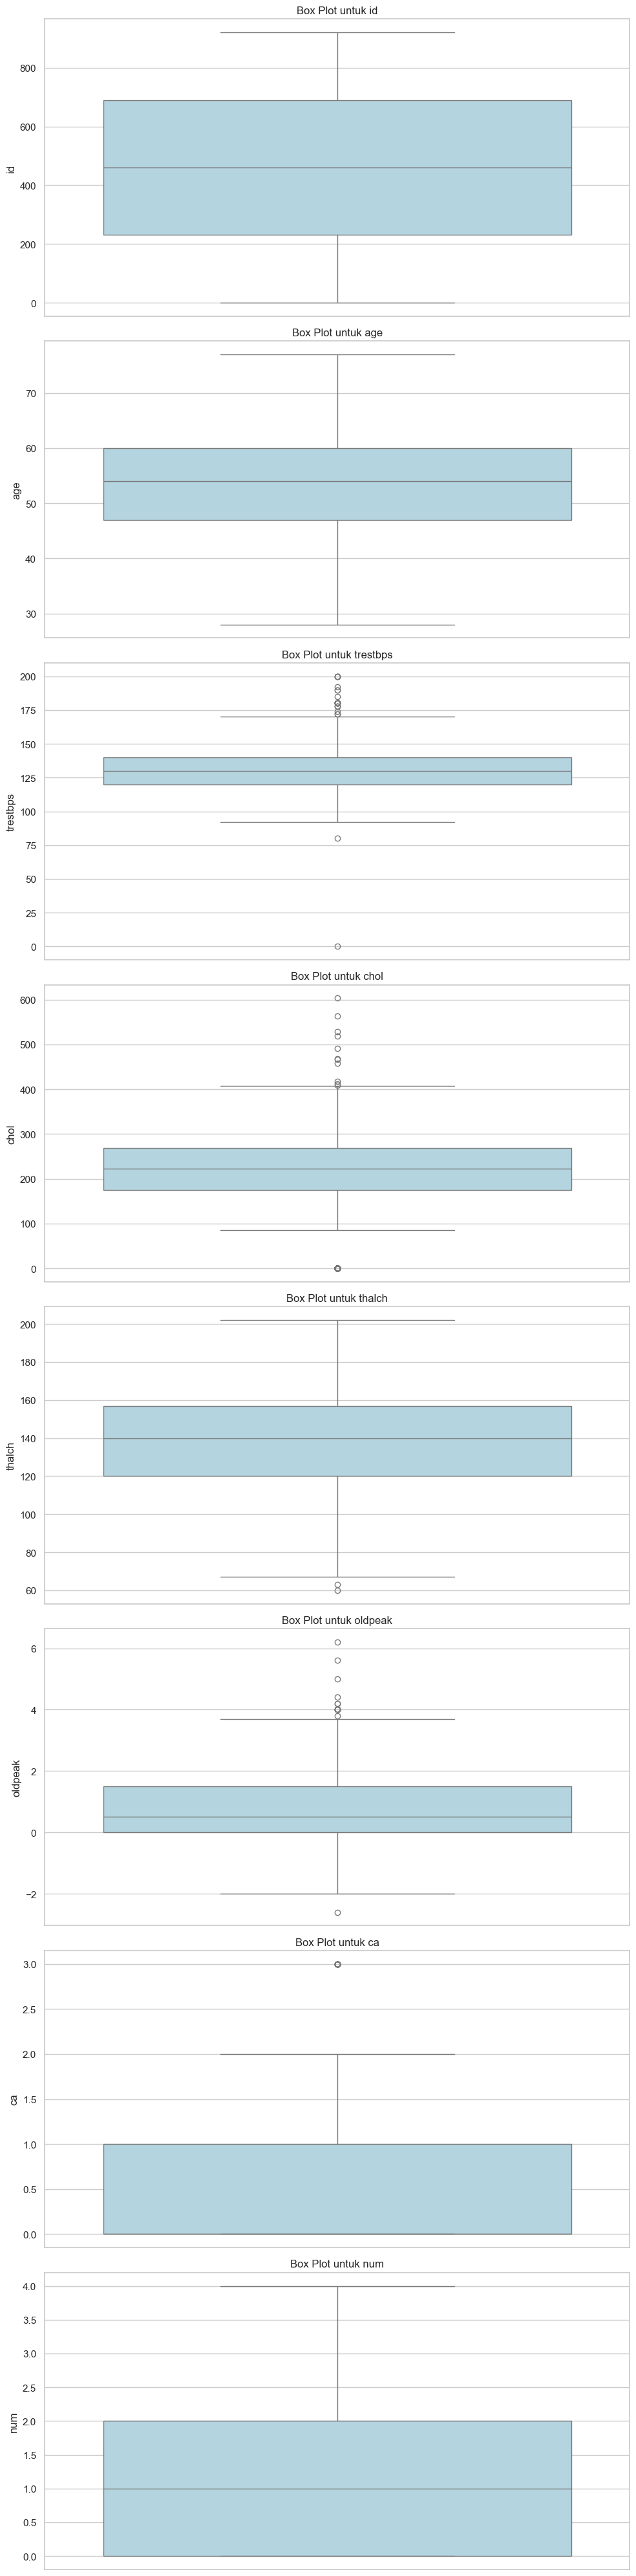

In [39]:
# Identifikasi outliers menggunakan box plots untuk setiap variabel numerik secara terpisah
num_plots = len(numeric_cols)
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(10, num_plots * 5))

for ax, col in zip(axes, numeric_cols):
    sns.boxplot(y=df[col], ax=ax, color='lightblue')
    ax.set_title(f'Box Plot untuk {col}')
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()


Matriks Korelasi Antar Variabel Numerik:
╒══════════╤════════════╤════════════╤════════════╤════════════╤═══════════╤════════════╤════════════╤═══════════╕
│          │         id │        age │   trestbps │       chol │    thalch │    oldpeak │         ca │       num │
╞══════════╪════════════╪════════════╪════════════╪════════════╪═══════════╪════════════╪════════════╪═══════════╡
│ id       │  1         │  0.239301  │  0.0529237 │ -0.376936  │ -0.466427 │  0.0499302 │  0.0614335 │  0.273552 │
├──────────┼────────────┼────────────┼────────────┼────────────┼───────────┼────────────┼────────────┼───────────┤
│ age      │  0.239301  │  1         │  0.244253  │ -0.0862344 │ -0.365778 │  0.258243  │  0.370416  │  0.339596 │
├──────────┼────────────┼────────────┼────────────┼────────────┼───────────┼────────────┼────────────┼───────────┤
│ trestbps │  0.0529237 │  0.244253  │  1         │  0.0928532 │ -0.104899 │  0.161908  │  0.0937045 │  0.122291 │
├──────────┼────────────┼────────────┼

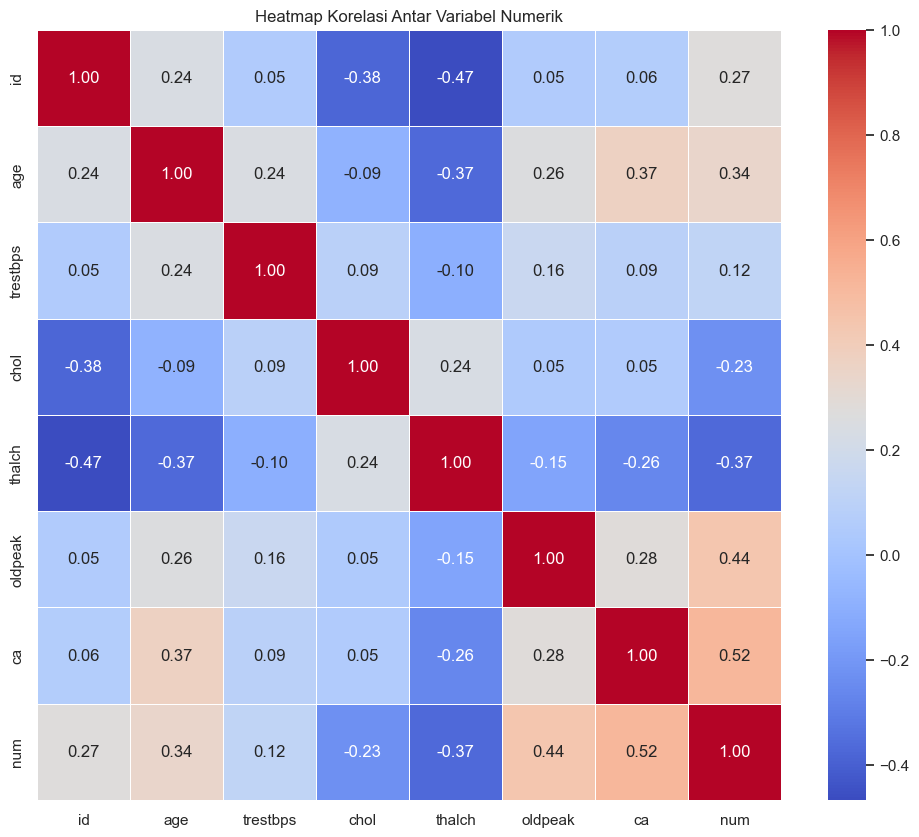

In [63]:
# Hitung korelasi Pearson untuk semua variabel numerik
# Pilih hanya kolom numerik dari DataFrame
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Tampilkan hasil korelasi
print("\nMatriks Korelasi Antar Variabel Numerik:")
print(tabulate(correlation_matrix, headers='keys', tablefmt='fancy_grid'))

# Visualisasi Heatmap Korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel Numerik')
plt.show()

Histogram untuk setiap variabel numerik


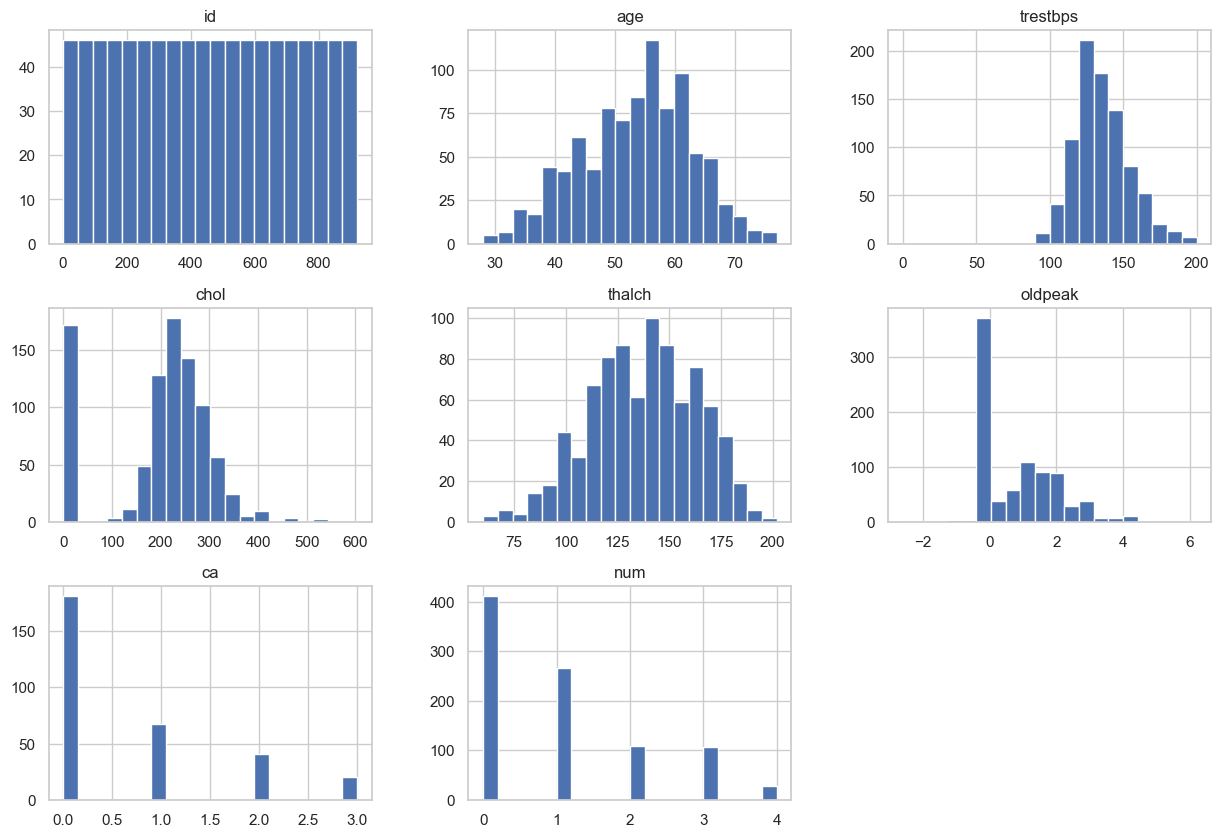

In [50]:
# Histogram untuk setiap variabel numerik

print("Histogram untuk setiap variabel numerik")
df.hist(bins=20, figsize=(15, 10))
plt.show()

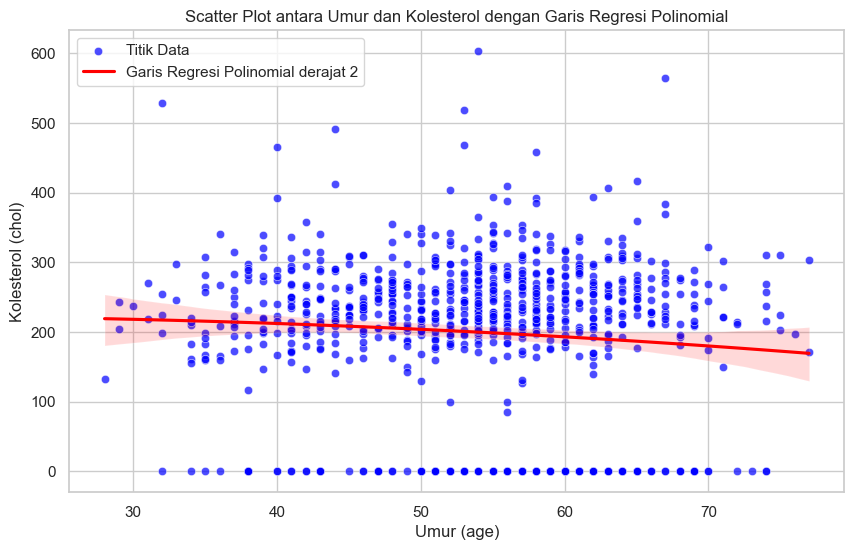

In [56]:
# Buat scatter plot untuk variabel dengan korelasi tinggi dengan 'chol'
plt.figure(figsize=(10, 6))  # Removed the unexpected indent here
sns.scatterplot(x= 'age', y='chol', data=df, color='blue', alpha=0.7, label='Titik Data')
sns.regplot(x='age', y='chol', data=df, scatter=False, color='red', label='Garis Regresi Polinomial derajat 2', order=2)
plt.xlabel('Umur (age)')
plt.ylabel('Kolesterol (chol)')
plt.title(f'Scatter Plot antara Umur dan Kolesterol dengan Garis Regresi Polinomial')
plt.legend()
plt.grid(True)
plt.show()

In [58]:
# Laporan singkat dari hasil analisis dataset UCI Heart Disease Data
report = f"""
### Laporan Singkat Analisis Data Penyakit Jantung

**1. Rangkuman Dataset:**
- **Sumber Data:** Dataset ini diambil dari file CSV yang terletak di `D:\\Dataset\\heart_disease_uci.csv`. Dataset ini berisi informasi medis tentang penyakit jantung.
- **Deskripsi Data:** Dataset mencakup berbagai variabel numerik dan kategorikal yang terkait dengan penyakit jantung, seperti usia, kolesterol, tekanan darah, dan lainnya.

**2. Proses Analisis Data:**

**a. Pembacaan Data:**
- **Membaca Data:** Data dimuat dari file CSV menggunakan `pandas.read_csv()`.
- **Tampilan Data:** Lima baris pertama dan terakhir dari dataset memberikan gambaran awal tentang isi data. Data ini termasuk berbagai variabel seperti usia, jenis kelamin, kolesterol, dan tekanan darah.

**b. Statistik Deskriptif:**
- **Statistik Deskriptif:** Statistik seperti rata-rata, median, mode, deviasi standar, dan kuartil dihitung untuk setiap variabel numerik. Ini memberikan gambaran tentang distribusi dan penyimpangan data.

**c. Identifikasi dan Penanganan Outliers:**
- **Box Plot:** Box plot untuk setiap variabel numerik ditampilkan secara terpisah untuk mengidentifikasi adanya outliers dalam dataset.
- **Histogram:** Histogram ditambahkan untuk visualisasi distribusi data dari setiap variabel numerik. Ini membantu dalam memahami bentuk distribusi dan frekuensi data.

**d. Pembersihan Data:**
- **Data Missing:** Setelah penanganan outliers, baris dengan nilai yang hilang pada kolom `chol` juga dihapus. Ini memastikan bahwa analisis berikutnya dilakukan pada data yang bersih dan tidak memiliki missing values.

**e. Analisis Korelasi:**
- **Korelasi Pearson:** Koefisien korelasi Pearson antara `age` (usia) dan `chol` (kolesterol) dihitung untuk menilai kekuatan hubungan linier antara kedua variabel. Nilai korelasi yang tinggi menunjukkan adanya hubungan yang kuat antara usia dan kolesterol.
  
  - **Kemungkinan Penyebab:** Hubungan positif ini bisa disebabkan oleh berbagai faktor biologis dan gaya hidup. Dengan bertambahnya usia, metabolisme tubuh dapat melambat, dan perubahan gaya hidup seperti diet atau aktivitas fisik mungkin mempengaruhi kadar kolesterol. 

  - **Kesehatan:** Peningkatan kadar kolesterol seiring bertambahnya usia dapat meningkatkan risiko penyakit jantung. Oleh karena itu, penting untuk memantau dan mengelola kadar kolesterol, terutama saat memasuki usia yang lebih tua.

**f. Visualisasi:**
  - **Heatmap Korelasi:** Heatmap menunjukkan bagaimana setiap variabel numerik dalam dataset berkorelasi satu sama lain. Warna yang lebih gelap menunjukkan korelasi yang lebih kuat.
  - **Plot Scatter:** Scatter plot menunjukkan hubungan antara variabel dengan korelasi tinggi dengan kolesterol (`chol`). Garis regresi polinomial derajat 2 ditambahkan untuk menggambarkan kemungkinan hubungan non-linier.
  - **Histogram:** Histogram memberikan pemahaman tentang distribusi data untuk setiap variabel numerik.

**3. Kesimpulan:**
- **Korelasi Usia dan Kolesterol:** Korelasi Pearson antara usia (`age`) dan kolesterol (`chol`) adalah sekitar 0.30, menunjukkan adanya hubungan positif yang moderat antara usia dan kadar kolesterol. Artinya, seiring bertambahnya usia, kecenderungan kadar kolesterol juga cenderung meningkat, meskipun hubungan ini tidak terlalu kuat.

  - **Kemungkinan Penyebab:** Hubungan positif ini bisa disebabkan oleh berbagai faktor biologis dan gaya hidup. Dengan bertambahnya usia, metabolisme tubuh dapat melambat, dan perubahan gaya hidup seperti diet atau aktivitas fisik mungkin mempengaruhi kadar kolesterol. 

  - **Kesehatan:** Peningkatan kadar kolesterol seiring bertambahnya usia dapat meningkatkan risiko penyakit jantung. Oleh karena itu, penting untuk memantau dan mengelola kadar kolesterol, terutama saat memasuki usia yang lebih tua.

- **Visualisasi Data:** Heatmap korelasi memberikan gambaran umum tentang hubungan antar variabel dalam dataset, sementara scatter plot bersama garis regresi polinomial membantu dalam memahami hubungan antara variabel dan kolesterol secara visual. Histogram memberikan wawasan tambahan tentang distribusi variabel numerik.

"""

# Tampilkan laporan
print(report)


### Laporan Singkat Analisis Data Penyakit Jantung

**1. Rangkuman Dataset:**
- **Sumber Data:** Dataset ini diambil dari file CSV yang terletak di `D:\Dataset\heart_disease_uci.csv`. Dataset ini berisi informasi medis tentang penyakit jantung.
- **Deskripsi Data:** Dataset mencakup berbagai variabel numerik dan kategorikal yang terkait dengan penyakit jantung, seperti usia, kolesterol, tekanan darah, dan lainnya.

**2. Proses Analisis Data:**

**a. Pembacaan Data:**
- **Membaca Data:** Data dimuat dari file CSV menggunakan `pandas.read_csv()`.
- **Tampilan Data:** Lima baris pertama dan terakhir dari dataset memberikan gambaran awal tentang isi data. Data ini termasuk berbagai variabel seperti usia, jenis kelamin, kolesterol, dan tekanan darah.

**b. Statistik Deskriptif:**
- **Statistik Deskriptif:** Statistik seperti rata-rata, median, mode, deviasi standar, dan kuartil dihitung untuk setiap variabel numerik. Ini memberikan gambaran tentang distribusi dan penyimpangan data.

**c. I